<font size="4" style="font-family:'Open Sans';"> 📡 <strong>Prédiction du Churn dans le Secteur des Télécommunications</strong> 📡 </font>



</br>
<font size="3" style="font-family:'Open Sans'; line-height:1.7">
L’objectif est de réaliser une analyse approfondie des données clients provenant d’une entreprise de télécommunications, afin de construire un modèle prédictif capable d’identifier les clients susceptibles de résilier leur abonnement, un phénomène communément appelé <strong>"churn"</strong>.

Dans le secteur des télécommunications, le **churn** est un enjeu critique, car il est souvent plus coûteux d'acquérir de nouveaux clients que de conserver ceux existants. En comprenant les facteurs qui influencent la résiliation, l’entreprise peut mettre en place des stratégies ciblées pour retenir ses clients et améliorer sa rentabilité à long terme.

Je travaillerai ici sur un jeu de données comprenant des informations démographiques des clients, les services souscrits, les détails des contrats ainsi que l’historique de facturation. 

L’analyse couvrira plusieurs étapes :  

- 🔍 **Exploration des données** : analyse des variables disponibles, traitement des données manquantes et transformation des données si nécessaire.  
    
- 📊 **Analyse des caractéristiques du churn** : identification des facteurs clés liés à la résiliation.
    
- 🤖 **Modélisation prédictive** : création et évaluation de modèles de machine learning, tels que la régression logistique et les arbres de décision, pour prédire le churn.  
    
- 🏆 **Comparaison des performances des modèles** : choix du modèle le plus performant afin de maximiser la capacité à identifier les clients à risque de churn.  

Grâce à cette analyse, je chercherai à répondre à la problématique suivante : 
    
**Quels sont les facteurs qui influencent le plus la résiliation des abonnements dans les télécommunications et comment peut-on les exploiter pour prédire efficacement le churn ?** </font>

# Importation des librairies

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Exploration des données

## Chargement du dataset

In [43]:
#Chargement du dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
#Observation des données
print("Le jeu de données contient " + str(df.shape[0]) + " lignes et " + str(df.shape[1]) + " colonnes")

Le jeu de données contient 7043 lignes et 21 colonnes


## Description des variables

</br>

<font size="3.5" style="font-family:'Open Sans'; line-height:2">Informations sur le client  </font> 
</br>  
<font size="2" style="font-family:'Open Sans'; line-height:1.5">
**Customer ID** - Identifiant du client.  
**gender** - Sexe du client (Homme ou Femme).  
**SeniorCitizen** - Le client est-il une personne âgée ? (1 = Oui, 0 = Non).  
**Partner** - Le client a-t-il un partenaire ? (Oui, Non).  
**Dependents** - Le client a-t-il des personnes à charge ? (Oui, Non).</font>

<font size="3.5" style="font-family:'Open Sans'; line-height:2"> Services souscrits par le client  </font>
</br>  
<font size="2" style="font-family:'Open Sans'; line-height:1.5">
**tenure** - Nombre de mois pendant lesquels le client est resté abonner.  
**PhoneService** - Le client a-t-il un service de téléphonie ? (Oui, Non).  
**MultipleLines** - Le client a-t-il plusieurs lignes téléphoniques ? (Oui, Non, Pas de service téléphonique).  
**InternetService** - Fournisseur de services Internet du client (DSL, Fibre optique, Aucun).  
**OnlineSecurity** - Le client a-t-il souscrit à un service de sécurité en ligne ? (Oui, Non, Pas de service Internet).  
**OnlineBackup** - Le client a-t-il souscrit à un service de sauvegarde en ligne ? (Oui, Non, Pas de service Internet).  
**DeviceProtection** - Le client a-t-il une protection des appareils ? (Oui, Non, Pas de service Internet).  
**TechSupport** - Le client a-t-il un support technique ? (Oui, Non, Pas de service Internet).  
**StreamingTV** - Le client a-t-il un service de streaming TV ? (Oui, Non, Pas de service Internet).  
**StreamingMovies** - Le client a-t-il un service de streaming de films ? (Oui, Non, Pas de service Internet).</font> 

<font size="3.5" style="font-family:'Open Sans'; line-height:2"> Détails du contrat</font> 
</br>  
<font size="2" style="font-family:'Open Sans'; line-height:1.5">
**Contract** - Durée du contrat du client (Mensuel, Un an, Deux ans).  
**PaperlessBilling** - Le client utilise-t-il la facturation sans papier ? (Oui, Non).  
**PaymentMethod** - Méthode de paiement du client (Chèque électronique, Chèque postal, Virement bancaire, Carte de crédit).  
**MonthlyCharges** - Montant facturé mensuellement au client.  
**TotalCharges** - Montant total facturé au client. 

<font size="3.5" style="font-family:'Open Sans'; line-height:2"> Résultats client</font>
</br>  
<font size="2" style="font-family:'Open Sans'; line-height:1.5"> 
**Churn** - Le client a-t-il résilié son abonnement ? (Oui, Non)</font>

## Nettoyage des données

In [45]:
#Vérification des types de données
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [46]:
#Conversion du TotalCharges en un type de données numériques
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [47]:
#Recherche des valeurs nulles
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [48]:
#Analyse des valeurs nulles
null_rows = df[df['TotalCharges'].isnull()]
null_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [49]:
#TotalCharges=0 quand tenure=0 > Nouveau client
#--> Remplacer les valeurs nulles par 0 
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Analyse descriptive

## Analyse des variables catégorielles

<font size="3" style="font-family:'Open Sans'; line-height:2">Cette analyse rapide vise à donner un aperçu des variables catégorielles qui influencent le churn des clients </font>

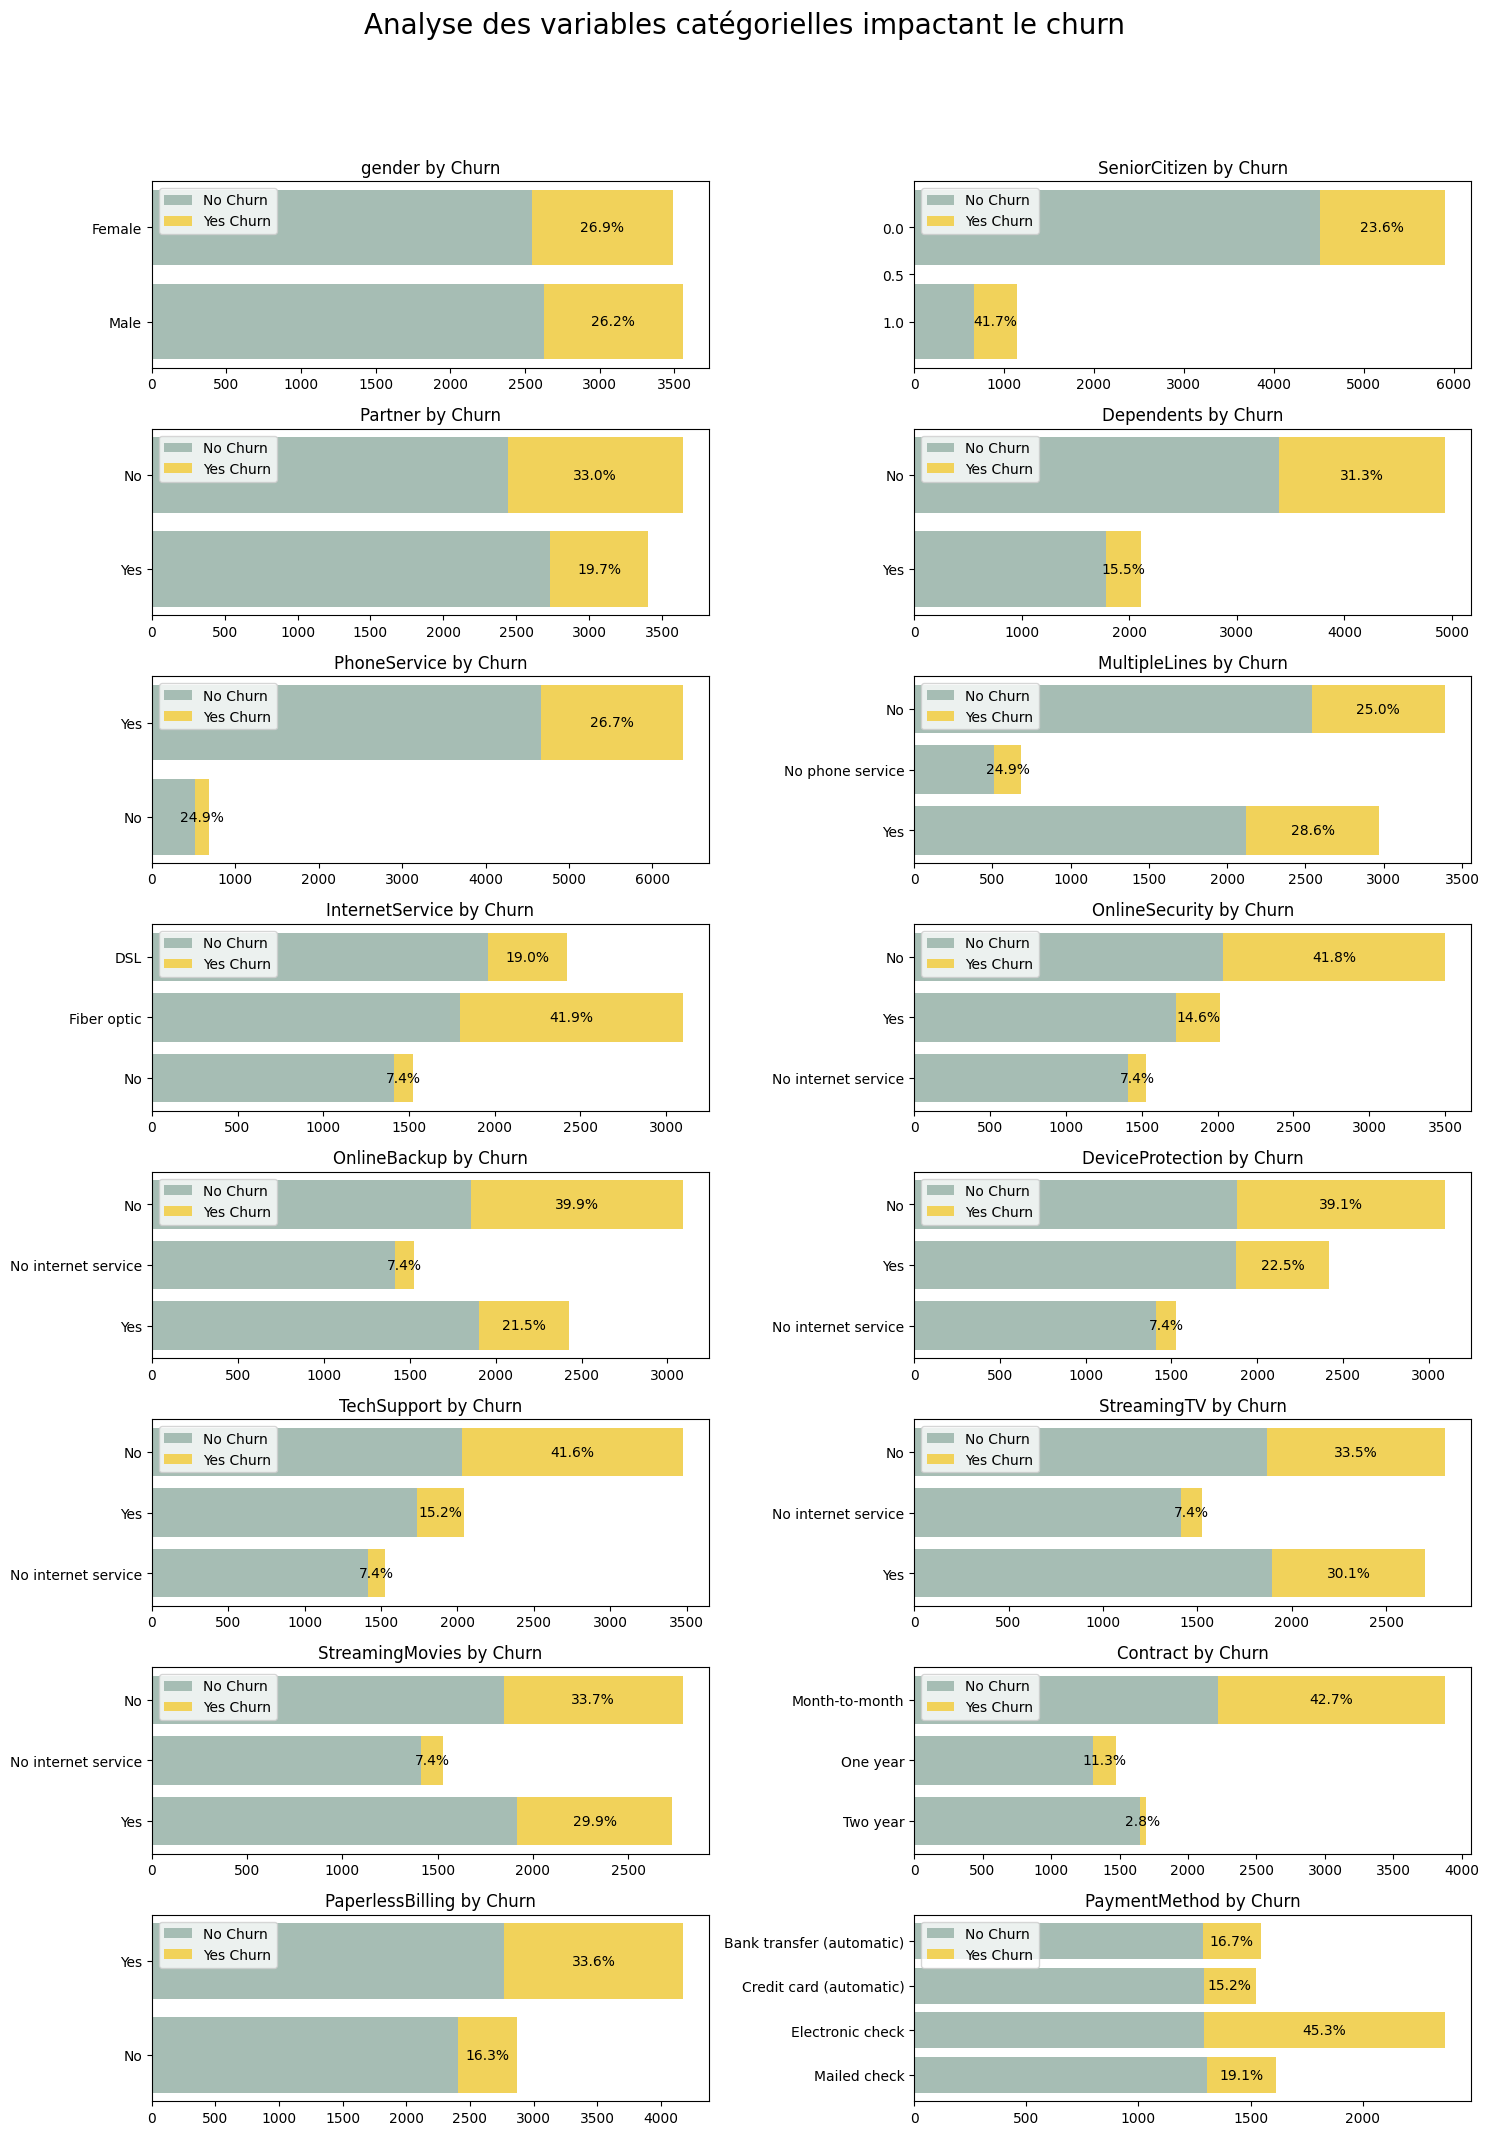

In [111]:
# Suppression des colonnes non catégoriques
dataset2 = df.drop(['MonthlyCharges', 'TotalCharges', 'customerID', 'tenure', 'Churn'], axis=1)

# Définition des couleurs pour les groupes 'Churn = Yes' et 'Churn = No'
churn_colors = {'No': '#A6BDB4', 'Yes': '#F1D25A'}

# Création de la figure avec une plus grande largeur et hauteur ajustée
fig = plt.figure(figsize=(15, 30))  # Largeur et hauteur adaptées
plt.suptitle('Analyse des variables catégorielles impactant le churn', fontsize=20)

# Boucle pour générer les histogrammes horizontaux en fonction du churn
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(11, 2, i)  # 11 lignes et 2 colonnes
    f = plt.gca()
    column_name = dataset2.columns.values[i - 1]
    f.set_title(f'{column_name} by Churn')
    
    # Séparer les données en deux groupes : 'Yes' et 'No'
    churn_yes = df[df['Churn'] == 'Yes'][column_name].value_counts()
    churn_no = df[df['Churn'] == 'No'][column_name].value_counts()
    
    # Aligner les index pour s'assurer que les catégories correspondent
    all_categories = churn_yes.index.union(churn_no.index)
    churn_yes = churn_yes.reindex(all_categories, fill_value=0)
    churn_no = churn_no.reindex(all_categories, fill_value=0)
    
    # Calcul des pourcentages uniquement pour 'Yes Churn' par rapport au total (Yes + No)
    total_churn = churn_yes + churn_no  # Somme totale des deux groupes
    churn_yes_pct = (churn_yes / total_churn) * 100  # Pourcentage de 'Yes Churn' uniquement par rapport au total
    
    # Création de l'histogramme empilé horizontal
    plt.barh(all_categories, churn_no.values, color=churn_colors['No'], label='No Churn')
    bars_yes = plt.barh(all_categories, churn_yes.values, left=churn_no.values, color=churn_colors['Yes'], label='Yes Churn')
    
    # Inverser l'axe Y pour que la catégorie avec plus de valeurs soit en haut
    plt.gca().invert_yaxis()

    # Ajouter la légende à gauche
    plt.legend(loc='upper left')

    # Ajouter les pourcentages sur les barres (uniquement pour 'Yes Churn' et sur la barre jaune)
    for bar, pct in zip(bars_yes, churn_yes_pct):
        width = bar.get_width()  # On se base uniquement sur la largeur de la barre 'Yes Churn'
        if width > 0:  # Vérification pour éviter d'afficher des pourcentages sur des barres de largeur 0
            plt.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, f'{pct:.1f}%', va='center', ha='center', color='black')

# Ajustement de la mise en page
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Affichage des graphiques
plt.show()

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

🔍 **Résultats :**
</br>

La série de graphiques montre l'influence de différents facteurs sur le churn.  
Voici quelques conclusions rapides basées sur les données visibles :

--------------------------------------------------------------------------------------------------------------
**Gender** : Le taux de churn est presque égal entre les hommes (**26.2%**) et les femmes (**26.9%**), indiquant que le genre n'a pas une forte influence sur le churn.  
**SeniorCitizen** : Les personnes âgées ont un taux de churn (**41.7%**) plus élevé que les non-seniors (**23.6%**).  
**Partner** : Les clients sans partenaire ont un taux de churn plus élevé (**33%**) que ceux avec un partenaire (**19.7%**).  
**Dépendents** : Les clients sans enfants sont plus susceptibles de churner (**31.3%**) que ceux avec des enfants (**15.5%**).  
**PhoneService** : Les clients n'ayant pas un service téléphonique ont un taux de churn légèrement plus faible (**24.8%**) comparé à ceux avec service (**26.7%**).  
**InternetService** : Les clients sans service Internet ou avec des services de base comme DSL sont moins susceptibles de churner. Par contre, ceux qui utilisent la fibre optique (**41.9%**) ont tendance à avoir un taux de churn plus élevé.  
**TechSupport** : Les clients sans support technique sont beaucoup plus susceptibles de churner (**41.6%**) que ceux qui ont un support (**15.2%**).  
**PaperlessBilling** : Les clients utilisant la facturation sans papier semblent avoir un taux de churn plus élevé (**33.6%**) que ceux qui n'utilisent pas cette option (**16.3%**).  
**PaymentMethod** : Les clients utilisant les chèques électroniques ont un taux de churn significativement plus élevé (**45.3%**) que ceux utilisant d'autres méthodes.  

--------------------------------------------------------------------------------------------------------------
📊 Les clients qui n'ont pas de services supplémentaires, comme le support technique, la sauvegarde en ligne tendent à avoir un taux de churn plus élevé. De plus, certains groupes démographiques spécifiques comme les seniors et les personnes sans partenaire semblent également plus susceptibles de churner.</font>



## Analyse des variables numériques

<font size="3" style="font-family:'Open Sans'; line-height:2">Cette analyse rapide vise à donner un aperçu des variables numériques qui influencent le churn des clients </font>

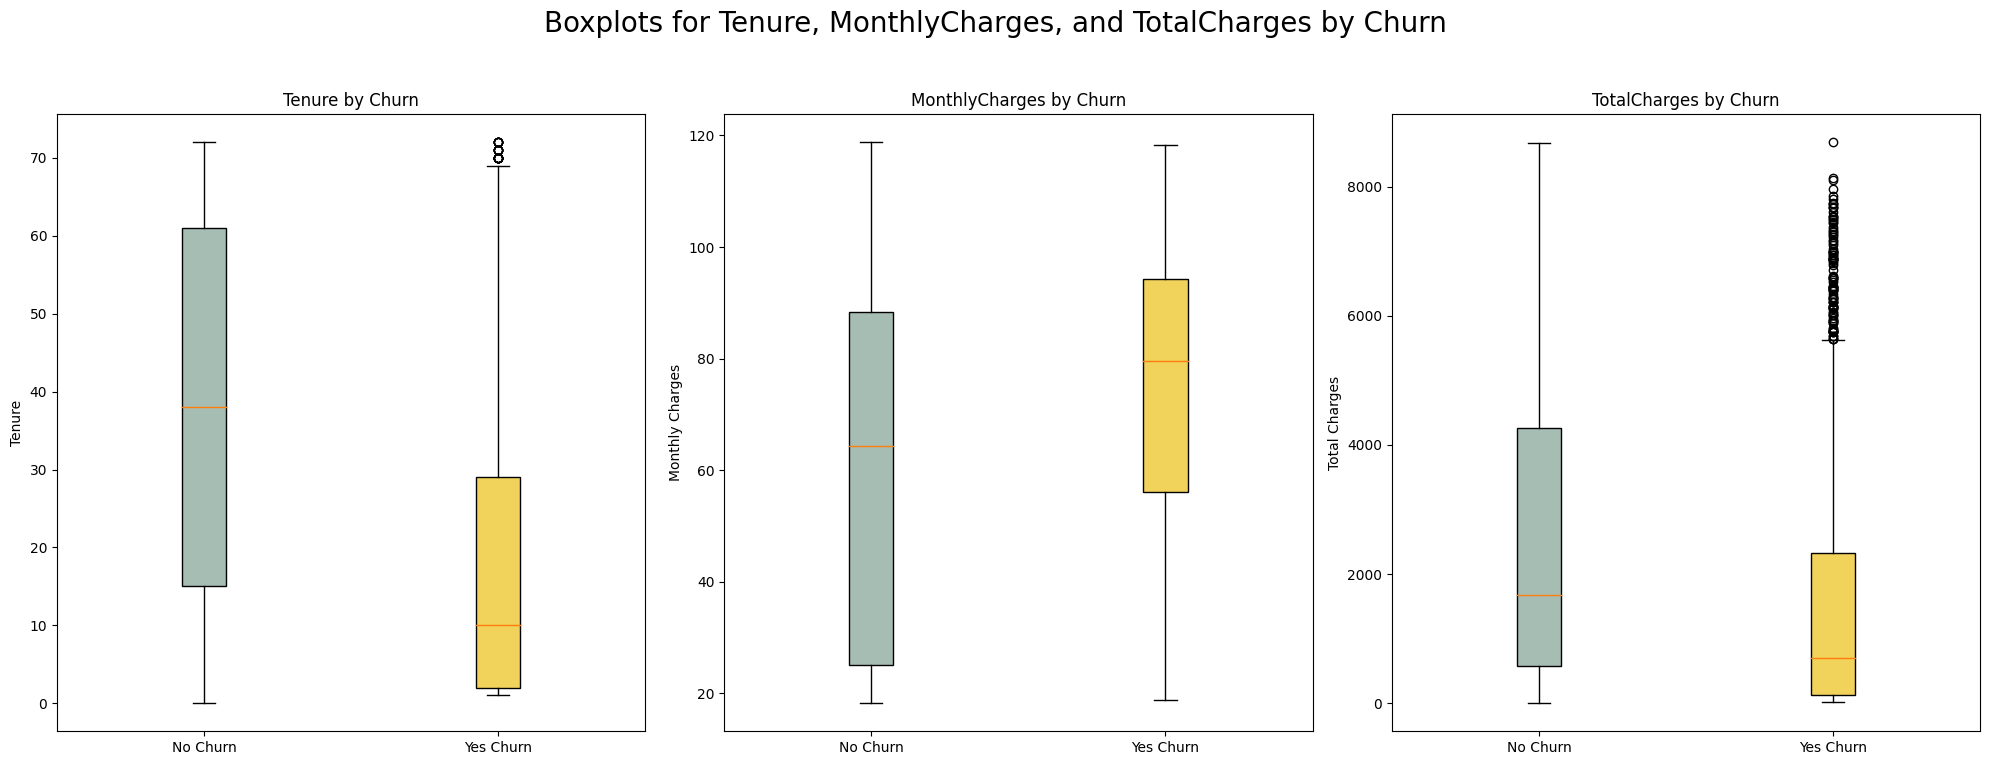

In [112]:
# Création de la figure pour afficher les trois boxplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # 1 ligne, 3 colonnes pour les boxplots
plt.suptitle('Boxplots for Tenure, MonthlyCharges, and TotalCharges by Churn', fontsize=20)

# Palette de couleurs
churn_colors = ['#A6BDB4', '#F1D25A']

# Boxplot pour la variable 'tenure'
data_tenure = [df[df['Churn'] == 'No']['tenure'], df[df['Churn'] == 'Yes']['tenure']]
boxes_tenure = axes[0].boxplot(data_tenure, patch_artist=True, labels=['No Churn', 'Yes Churn'])
for patch, color in zip(boxes_tenure['boxes'], churn_colors):
    patch.set_facecolor(color)
axes[0].set_title('Tenure by Churn')
axes[0].set_ylabel('Tenure')

# Boxplot pour la variable 'MonthlyCharges'
data_monthlycharges = [df[df['Churn'] == 'No']['MonthlyCharges'], df[df['Churn'] == 'Yes']['MonthlyCharges']]
boxes_monthlycharges = axes[1].boxplot(data_monthlycharges, patch_artist=True, labels=['No Churn', 'Yes Churn'])
for patch, color in zip(boxes_monthlycharges['boxes'], churn_colors):
    patch.set_facecolor(color)
axes[1].set_title('MonthlyCharges by Churn')
axes[1].set_ylabel('Monthly Charges')

# Boxplot pour la variable 'TotalCharges'
data_totalcharges = [df[df['Churn'] == 'No']['TotalCharges'], df[df['Churn'] == 'Yes']['TotalCharges']]
boxes_totalcharges = axes[2].boxplot(data_totalcharges, patch_artist=True, labels=['No Churn', 'Yes Churn'])
for patch, color in zip(boxes_totalcharges['boxes'], churn_colors):
    patch.set_facecolor(color)
axes[2].set_title('TotalCharges by Churn')
axes[2].set_ylabel('Total Charges')

# Ajustement de la mise en page
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Affichage des boxplots
plt.show()

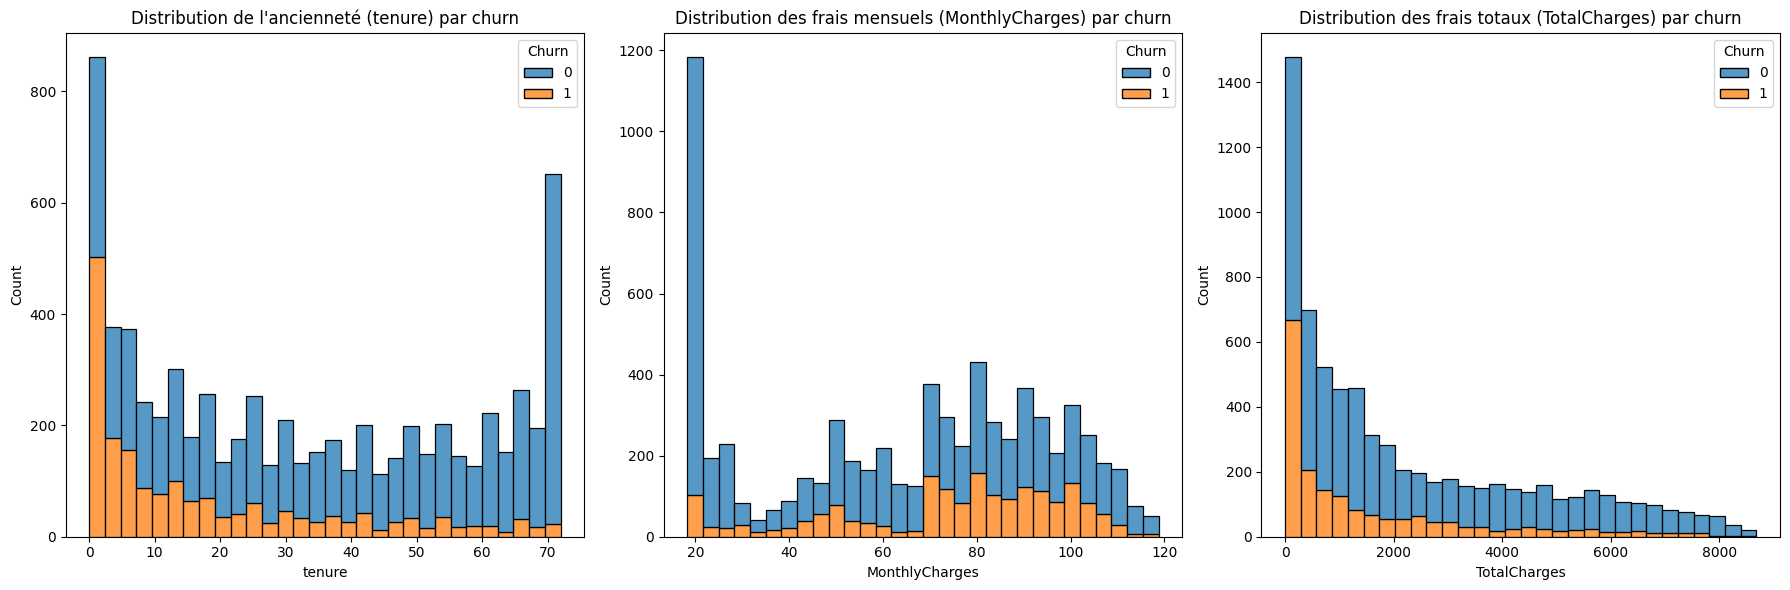

In [71]:
# Créer une figure avec 3 sous-graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Premier graphique - Distribution de tenure par churn
sns.histplot(data=final_df_new, x='tenure', hue='Churn', multiple='stack', bins=30, ax=axes[0])
axes[0].set_title('Distribution de l\'ancienneté (tenure) par churn')

# Deuxième graphique - Distribution de MonthlyCharges par churn
sns.histplot(data=final_df_new, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, ax=axes[1])
axes[1].set_title('Distribution des frais mensuels (MonthlyCharges) par churn')

# Troisième graphique - Distribution de TotalCharges par churn
sns.histplot(data=final_df_new, x='TotalCharges', hue='Churn', multiple='stack', bins=30, ax=axes[2])
axes[2].set_title('Distribution des frais totaux (TotalCharges) par churn')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

🔍 **Résultats :**
</br>

**Tenure** : Les clients qui ne churnent pas ont généralement une durée d'abonnement beaucoup plus longue, avec une médiane d'environ 40 mois, tandis que ceux qui churnent ont une ancienneté beaucoup plus courte, en dessous de 15 mois en médiane.

**MonthlyCharges** : Les clients qui churnent ont tendance à payer des frais mensuels légèrement plus élevés, avec une médiane autour de 75 dollars, comparé à environ 60 dollars pour ceux qui restent.

**TotalCharges**: Les clients qui ne churnent pas accumulent des frais totaux beaucoup plus élevés, ce qui est logique étant donné leur ancienneté plus longue, tandis que les clients qui churnent ont des frais totaux plus faibles, bien qu'il y ait plusieurs **outliers**. J'analyserai ces **outliers** par la suite pour mieux comprendre ce qui pourrait expliquer ces résiliations inhabituelles et leur impact potentiel sur la stratégie de rétention.

📊 Ces résultats montrent que les clients avec une **ancienneté courte** et des **frais mensuels plus élevés** sont plus susceptibles de churner, tandis que ceux avec une durée plus longue et des charges cumulées importantes sont plus susceptibles de rester.</font>

## Analyse des outliers

In [52]:
#Afficher les outliers
#Filtrer les clients avec Churn = "Yes" et TotalCharges > 6000
churn_high_charges = df[(df['Churn'] == 'Yes') & (df['TotalCharges'] > 6000)]
#Afficher les résultats
churn_high_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
104,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes
339,1343-EHPYB,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.40,6603.00,Yes
402,0979-PHULV,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.45,7007.60,Yes
445,7752-XUSCI,Female,0,No,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,6396.45,Yes
609,3419-SNJJD,Female,1,Yes,No,65,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),105.25,6786.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,3090-HAWSU,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.60,6876.05,Yes
6853,9079-YEXQJ,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,111.10,6014.85,Yes
6945,6797-LNAQX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.50,Yes
6972,6664-FPDAC,Female,1,No,No,56,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,6418.90,Yes


In [53]:
# Visualiser quelques statistiques descriptives de ce sous-ensemble
print(churn_high_charges[['tenure', 'TotalCharges', 'PaymentMethod']].describe())

          tenure  TotalCharges
count  88.000000     88.000000
mean   65.306818   6879.561932
std     4.619693    606.738405
min    54.000000   6010.050000
25%    62.000000   6393.175000
50%    66.000000   6872.825000
75%    69.000000   7325.850000
max    72.000000   8684.800000


<font size="3" style="font-family:'Open Sans'; line-height:1.5">

🔍 **Résultats :**
</br>

88 clients ont été identifiés comme ayant résilié leur abonnement malgré des charges totales (**TotalCharges**) élevées.

L'analyse des ces clients révèle plusieurs points intéressants :

- La durée moyenne d'abonnement (**tenure**) de ces clients est de **65,3 mois**, avec un écart-type relativement faible, ce qui indique que ces clients sont restés fidèles à l'entreprise pendant une période prolongée.

- Les charges totales (**TotalCharges**) varient de **6010 à 8684 dollars**, ce qui suggère que ces clients ont souscrit à des services coûteux et sont restés pendant une période significative, accumulant des frais importants.

- En termes de distribution, **25%** de ces clients ont un abonnement inférieur à **62 mois**, tandis que **75%** ont un abonnement inférieur à **69 mois**, avec un abonnement maximum de **72 mois**.


📊 Cette analyse montre que ces clients représentent une catégorie à haute valeur, avec des **frais cumulés importants** et une **durée d'engagement prolongée**. Leur décision de résilier peut être le signe de problèmes latents non liés à la durée ou au coût, tels que des problèmes de satisfaction client ou des offres plus compétitives ailleurs. Ces **outliers** méritent une attention particulière, car comprendre pourquoi ces clients à long terme résilient pourrait aider à améliorer les stratégies de rétention.

Bien que ces clients puissent être perçus comme des **outliers** en raison de leurs charges élevées et de leur ancienneté, il est judicieux de les conserver pour la **modélisation**. En effet, ces clients représentent un sous-groupe précieux à haute valeur qui, malgré un engagement prolongé et des frais élevés, ont choisi de résilier leur contrat. Leur comportement est significatif, car ils pourraient révéler des facteurs clés de churn que le modèle devrait prendre en compte, comme la satisfaction client, le rapport qualité-prix ou la compétitivité du marché.

Ainsi, les inclure dans la modélisation peut permettre au modèle de mieux généraliser et de capturer des **patterns comportementaux** spécifiques aux clients à long terme et à haute valeur, ce qui est essentiel pour améliorer les stratégies de rétention et prévenir le churn futur.</font>


# Préparation des données pour la modélisation

## Encodage des variables binaires et multivariées (Binaire et One-Hot)

<font size="3" style="font-family:'Open Sans'; line-height:1.5">Avant d'entamer la modélisation, il est essentiel de préparer les données de manière à ce qu'elles soient dans un format exploitable par les algorithmes. Cette étape inclut l'**encodage** des variables catégorielles, aussi bien **binaires que multivariées**, afin de convertir les informations textuelles en valeurs numériques.</font>

In [61]:
# Remplacer 'Yes' et 'No' par 1 et 0 pour les colonnes à deux catégories
two_level_vars = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Créer une copie du DataFrame initial pour éviter de le modifier
df_new = df.copy()

# Fonction pour remplacer 'Yes' par 1, 'No' par 0
def replacer(df, col):
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# Appliquer la fonction sur toutes les colonnes dans two_level_vars
for col in two_level_vars:
    replacer(df_new, col)

# Étape supplémentaire : Encodage de la colonne 'gender' (1 pour Male, 0 pour Female)
df_new['gender'] = df_new['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Étape 4 : Appliquer le One-Hot Encoding pour les colonnes avec plus de deux catégories
multi_level_vars = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Appliquer pd.get_dummies() pour encoder ces colonnes
one_hot_encoded_df = pd.get_dummies(df_new[multi_level_vars], drop_first=False)

# Convertir les booléens en 0 et 1 (au cas où pd.get_dummies aurait généré des booléens)
one_hot_encoded_df = one_hot_encoded_df.astype(int)

# Supprimer les colonnes d'origine qui ont été One-Hot Encodées
df_new = df_new.drop(columns=multi_level_vars)

# Ajouter les colonnes One-Hot Encodées au DataFrame
df_new = pd.concat([df_new, one_hot_encoded_df], axis=1)

# Afficher les premières lignes du DataFrame final
df_new.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,99.65,820.50,...,0,0,1,1,0,0,0,0,1,0
6,1452-KIOVK,1,0,0,1,22,1,1,89.10,1949.40,...,1,0,0,1,0,0,0,1,0,0
7,6713-OKOMC,0,0,0,0,10,0,0,29.75,301.90,...,1,0,0,1,0,0,0,0,0,1
8,7892-POOKP,0,0,1,0,28,1,1,104.80,3046.05,...,0,0,1,1,0,0,0,0,1,0
9,6388-TABGU,1,0,0,1,62,1,0,56.15,3487.95,...,1,0,0,0,1,0,1,0,0,0


In [62]:
#Suppression colonne customerID
final_df_new = df_new.drop(['customerID'],axis=1)
final_df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,1,0,0,1,0,0,0,0,0,1


<font size="4.5" style="font-family:'Open Sans'; line-height:2">Les données sont donc prêtes pour la phase de **modélisation** qui suivra. </font>

##  Analyse des corrélations et importance des features

<font size="3" style="font-family:'Open Sans'; line-height:1.5"> Le graphique ci-dessous montre la corrélation linéaire entre chaque variable et le churn. L'objectif est d'identifier les variables qui ont le plus d'influence sur la probabilité de churn et celles qui pourraient être moins pertinentes.</font>

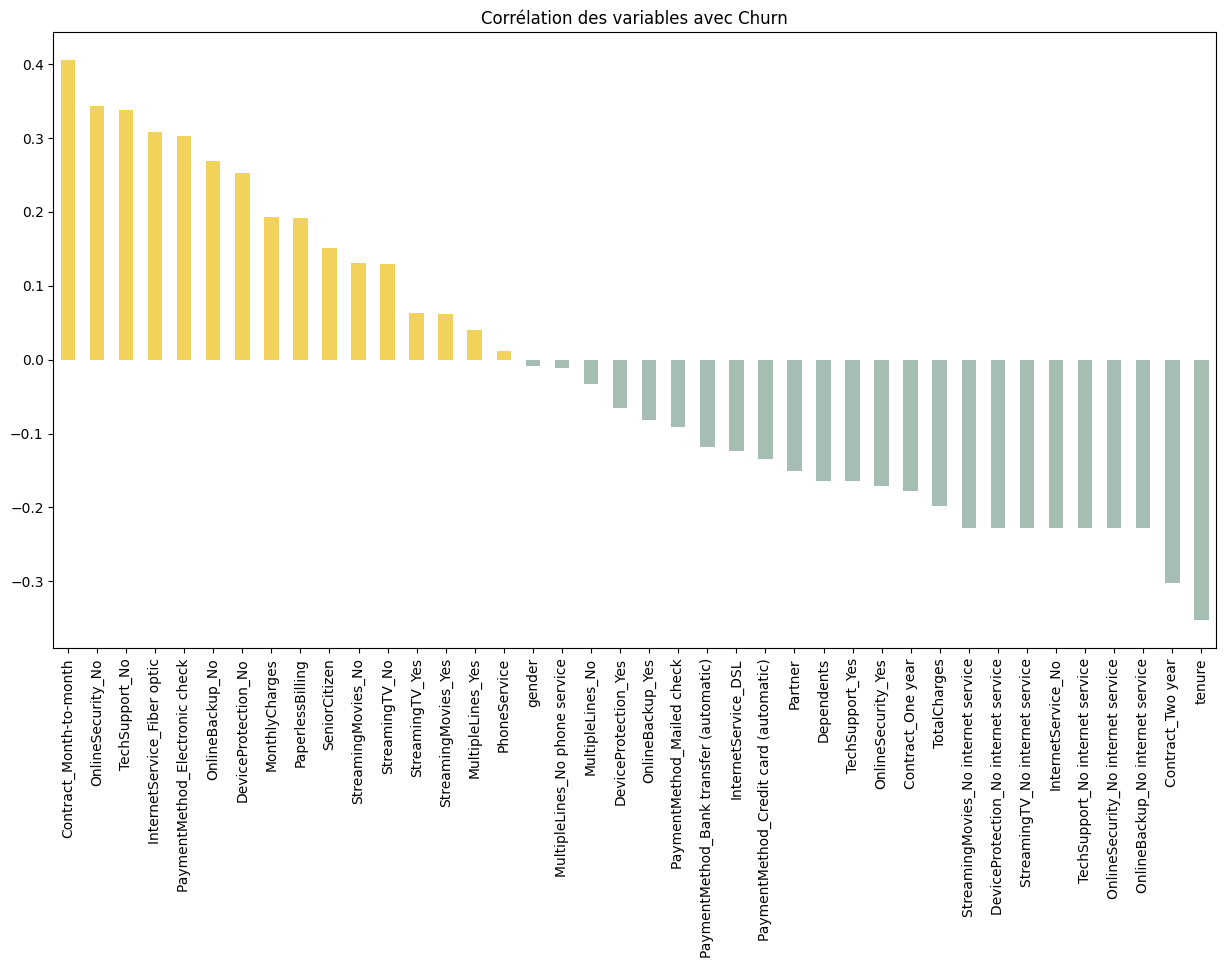

In [114]:
# Calcul de la corrélation et suppression de 'Churn' pour ne pas l'afficher
correlation = final_df_new.corr()['Churn'].drop('Churn').sort_values(ascending=False)

# Définir les couleurs : #E1B82C pour les positives, #A6BDB4 pour les négatives
colors = ['#F1D25A' if x > 0 else '#A6BDB4' for x in correlation]

# Créer la figure
plt.figure(figsize=(15, 8))

# Tracer le graphique en barres avec les couleurs spécifiques
correlation.plot(kind='bar', color=colors)

# Afficher le graphique
plt.title('Corrélation des variables avec Churn')
plt.show()

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

🔍 **Résultats :**
</br>

D'après ce graphique, certaines variables se distinguent par leur forte corrélation avec le churn :

- Les clients avec un contrat mensuel (**Contract_Month-to-month**) sont les plus susceptibles de churner, avec la plus forte corrélation positive.

- Les variables comme **OnlineSecurity_No** et **TechSupport_No** montrent également une corrélation significative avec le churn, ce qui indique que l'absence de ces services est un facteur important pour expliquer la résiliation.

- D'un autre côté, la durée d'engagement (**tenure**) a une corrélation négative importante, suggérant que les clients avec une ancienneté plus longue sont moins susceptibles de churner.

- Les contrats sur une plus longue période (**Contract_One year** et **Contract_Two year**) sont également associés à une rétention plus élevée, comme l'indique leur corrélation négative.


📊 Ces informations seront utiles pour la modélisation en nous permettant d'identifier les variables les plus pertinentes à inclure dans nos modèles prédictifs. Elles montrent clairement que certains services, **l'ancienneté**, et la **nature du contrat** jouent un rôle crucial dans la fidélisation des clients.</font>

## Équilibrage des classes par sur-échantillonnage

<font size="3" style="font-family:'Open Sans'; line-height:1.5">Les données initiales présentent un **déséquilibre** important entre les clients qui ont churné et ceux qui ne l'ont pas fait. Ce déséquilibre peut biaiser les performances des modèles de machine learning, car les modèles ont tendance à privilégier la classe majoritaire. Pour corriger cela, j'ai utilisé la technique **SMOTE** (Synthetic Minority Over-sampling Technique), qui génère artificiellement de nouvelles observations pour la classe minoritaire (les clients qui churnent) en interpolant entre les points existants. L'objectif est de rééquilibrer les classes pour garantir que le modèle apprenne de manière équitable à partir des deux catégories.</font>

In [72]:
# Séparation des caractéristiques (X) et de la cible (y)
X = final_df_new.loc[:, final_df_new.columns != 'Churn']
y = final_df_new.loc[:, final_df_new.columns == 'Churn']
y = pd.DataFrame(y)

# Initialiser SMOTE
os = SMOTE(random_state=0)
columns = X.columns

# Appliquer SMOTE avec fit_resample
os_data_X, os_data_y = os.fit_resample(X, y.values.ravel())

# Conversion en DataFrames
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Churn'])

# Afficher les informations sur les données suréchantillonnées
print("La taille des données suréchantillonnées est de",len(os_data_X))
print("Nombre de 'No Churn' dans les données suréchantillonnées :",len(os_data_y[os_data_y['Churn'] == 0]))
print("Nombre de 'Churn' :",len(os_data_y[os_data_y['Churn'] == 1]))
print("Proportion de 'No Churn' dans les données suréchantillonnées :",len(os_data_y[os_data_y['Churn'] == 0]) / len(os_data_X))
print("Proportion de 'Churn' dans les données suréchantillonnées :",len(os_data_y[os_data_y['Churn'] == 1]) / len(os_data_X))

La taille des données suréchantillonnées est de 10348
Nombre de 'No Churn' dans les données suréchantillonnées : 5174
Nombre de 'Churn' : 5174
Proportion de 'No Churn' dans les données suréchantillonnées : 0.5
Proportion de 'Churn' dans les données suréchantillonnées : 0.5


In [ ]:
#Concaténation
os_data_Xy = pd.concat([os_data_X.reset_index(drop=True), os_data_y.reset_index(drop=True)], axis=1)

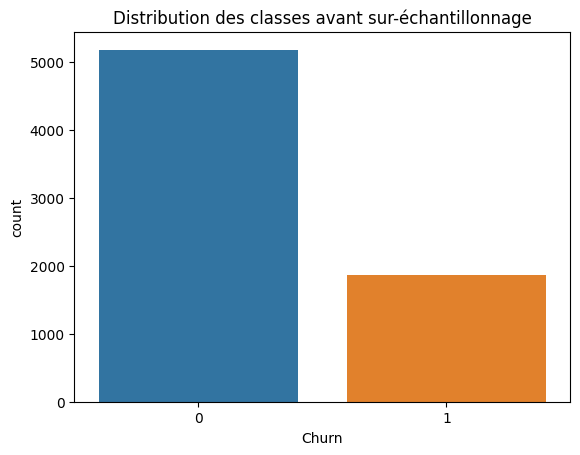

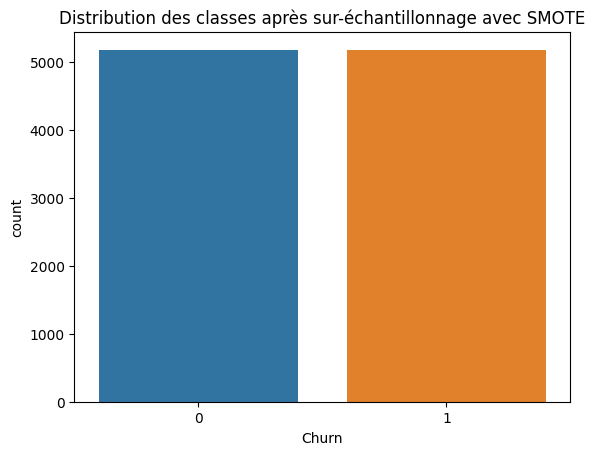

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Avant sur-échantillonnage
sns.countplot(x='Churn', data=final_df_new)
plt.title("Distribution des classes avant sur-échantillonnage")
plt.show()

# Après sur-échantillonnage
sns.countplot(x='Churn', data=os_data_y)
plt.title("Distribution des classes après sur-échantillonnage avec SMOTE")
plt.show()


<font size="3" style="font-family:'Open Sans'; line-height:1.5"> Nous avons maintenant un jeu de données **équilibré**, avec autant de clients qui ont churné que de clients qui ne l'ont pas fait. Cela nous permet d'entraîner des modèles prédictifs sans que ceux-ci ne soient influencés par le déséquilibre initial des classes. Le dataset équilibré est prêt pour la prochaine étape de la modélisation.</font>

# Modélisation

## Régression logistique

<font size="3" style="font-family:'Open Sans'; line-height:1.5">La régression logistique est utilisée ici pour modéliser la probabilité qu'un client résilie son abonnement. C'est un modèle simple et interprétable, souvent utilisé pour la classification binaire.</font>

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

**Sélection des features avec RFECV :**

Afin d'optimiser notre modèle, j'ai utilisé la méthode **RFECV** (Recursive Feature Elimination with Cross-Validation), qui permet de sélectionner les **variables les plus pertinentes** pour maximiser les performances du modèle. Cela garantit que seules les **features** les plus importantes sont utilisées, tout en minimisant le bruit des variables moins significatives.</font>

In [115]:
# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

# Normaliser les données avant d'appliquer RFECV
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser la régression logistique
logreg = LogisticRegression(max_iter=1000, random_state=0)

# Utiliser RFECV pour sélectionner les meilleures features avec validation croisée
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_scaled, y_train.values.ravel())

# Obtenir les features sélectionnées
selected_features = X_train.columns[rfecv.support_]
print("Features sélectionnées:", selected_features)
print(f"Nombre optimal de features : {rfecv.n_features_}")

# Utiliser uniquement les features sélectionnées pour l'entraînement et la prédiction
X_train_rfecv = X_train_scaled[:, rfecv.support_]
X_test_rfecv = X_test_scaled[:, rfecv.support_]

# Entraîner le modèle avec les données normalisées et les features sélectionnées
logreg.fit(X_train_rfecv, y_train.values.ravel())

# Faire des prédictions
y_pred = logreg.predict(X_test_rfecv)

# Évaluer les performances du modèle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Features sélectionnées: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Nom

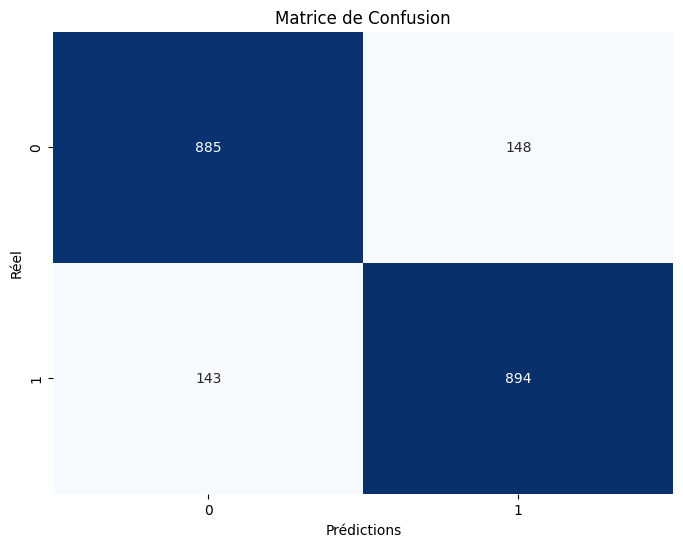

In [116]:
# Prédictions réelles et test réels
y_pred = logreg.predict(X_test_rfecv)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

🔍 **Résultats :**
</br>

Dans cette analyse, j'ai utilisé la **régression logistique** pour prédire la probabilité qu'un client résilie son abonnement. Pour améliorer les performances du modèle et garantir une interprétation optimale, j'ai appliqué la méthode **RFECV** (Recursive Feature Elimination with Cross-Validation). Cette méthode permet de sélectionner automatiquement le nombre optimal de **features** qui contribuent le plus aux performances du modèle.

Le résultat de l'algorithme **RFECV** a montré que **33 features** étaient nécessaires pour maximiser la performance du modèle donc la totalité du dataset. Bien que cela puisse sembler un nombre élevé, il est important de comprendre que dans des jeux de données complexes avec des variables encodées (comme les services souscrits, les méthodes de paiement, etc.), chaque feature apporte une contribution subtile mais **importante** à la prédiction finale.

**Performances du modèle :**

J'ai ensuite évalué les performances du modèle en utilisant plusieurs métriques importantes :

**Accuracy** : La proportion totale de prédictions correctes parmi toutes les prédictions effectuées.  
**Precision** : La proportion de prédictions positives qui sont réellement positives.  
**Recall** : La capacité du modèle à identifier les instances positives parmi toutes les positives.  
**F1-Score** : La moyenne harmonique entre la précision et le recall, utile pour équilibrer ces deux métriques quand elles sont en conflit.

📊 Grâce à cette sélection de features, notre modèle a atteint une accuracy de **85,94%**, une précision de **85,80%**, un recall de **86,21%**, et un F1-Score de **86%**. 
Ces résultats montrent que le modèle est bien équilibré et performant pour prédire les churners, tout en minimisant les faux positifs et faux négatifs.</font>

## Random Forest

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

Dans cette section, j'ai utilisé un modèle de **Random Forest** pour prédire la probabilité qu’un client résilie son abonnement. Contrairement à la régression logistique, le modèle de **Random Forest** est un algorithme d'ensemble basé sur des **arbres de décision**. Il a la capacité de modéliser des relations complexes non linéaires entre les variables, ce qui en fait un choix populaire pour des problèmes de classification comme celui-ci.

Un des avantages clés de **Random Forest** est qu’il n’a pas besoin de sélection préalable des **features**. Le modèle peut automatiquement identifier les variables les plus importantes tout en minimisant l'effet des **features** redondantes ou non pertinentes.</font>

In [84]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

# Initialisation du modèle de Random Forest
rf_classifier = RandomForestClassifier(random_state=0)

# Entraîner le modèle sur les données suréchantillonnées
rf_classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [86]:
# Prédire les résultats sur l'ensemble de test
y_pred_rf = rf_classifier.predict(X_test)

In [87]:
# Calculer la matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculer les métriques
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Afficher les résultats
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(f'Random Forest Precision: {precision_rf:.4f}')
print(f'Random Forest Recall: {recall_rf:.4f}')
print(f'Random Forest F1 Score: {f1_rf:.4f}')

Random Forest Accuracy: 0.8507
Random Forest Precision: 0.8467
Random Forest Recall: 0.8573
Random Forest F1 Score: 0.8519


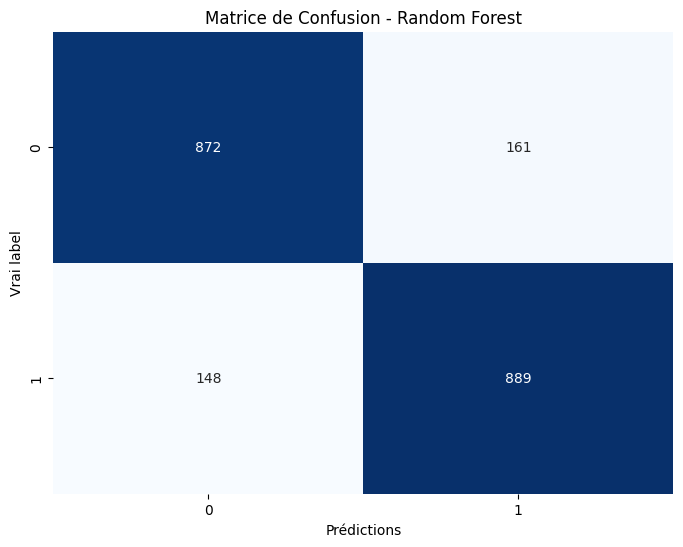

In [90]:
# Affichage de la matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion - Random Forest')
plt.xlabel('Prédictions')
plt.ylabel('Vrai label')
plt.show()

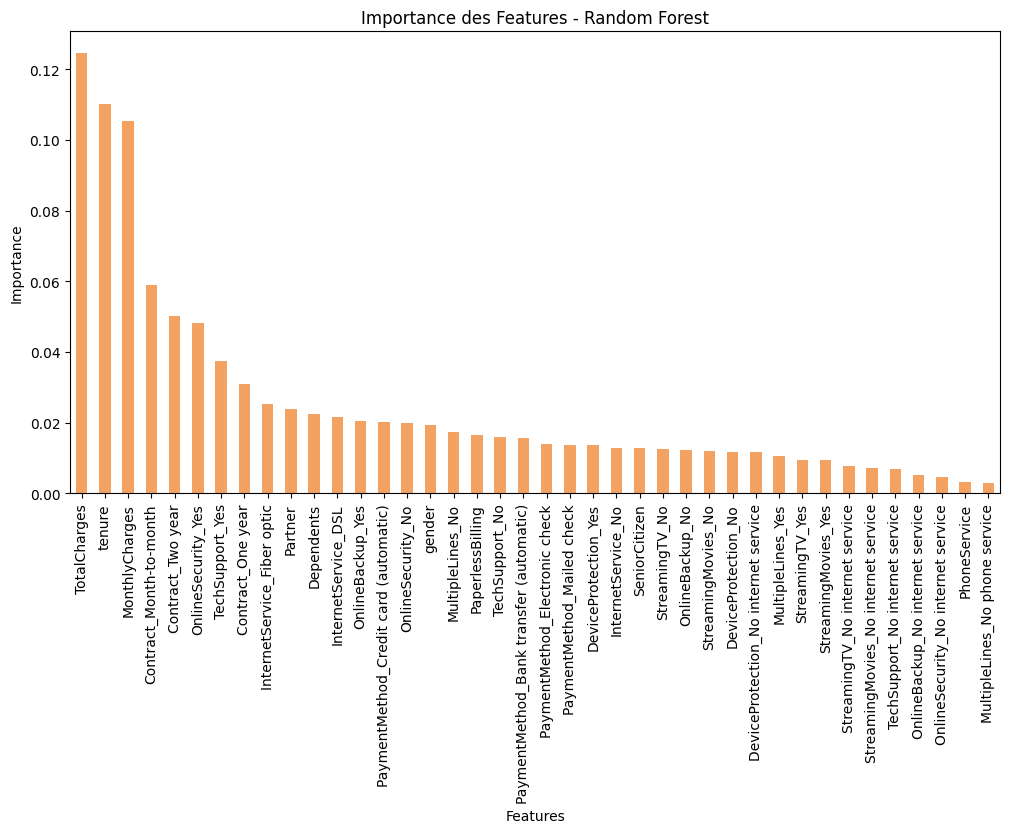

In [117]:
# Obtenir l'importance des features
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)

# Trier les features par importance
feature_importances = feature_importances.sort_values(ascending=False)

# Tracer l'importance des features
plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar', color='#F4A261')
plt.title('Importance des Features - Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

🔍 **Résultats :**
</br>

Le modèle **Random Forest** a obtenu des résultats solides avec une accuracy de **85,07%**, une précision de **84,67%**, un recall de **85,73%**, et un F1-Score de **85,19%**. Ces performances sont légèrement inférieures à celles de la régression logistique mais restent équilibrées et démontrent une bonne capacité à détecter les churners tout en minimisant les erreurs.

Le graphique d'importance des features montre que les variables les plus influentes pour prédire le churn pour ce modèle sont les charges totales (**TotalCharges**), l'ancienneté (**tenure**), et les frais mensuels (**MonthlyCharges**). 
Ces trois variables dominent, suivies de l'impact des types de contrat et de l'utilisation de services comme la sécurité en ligne (**OnlineSecurity**) et le support technique (**TechSupport**). Ces résultats confirment que les aspects liés à l'ancienneté, aux services souscrits et à la facturation jouent un rôle clé dans la décision de churn des clients.

📊 En résumé, **Random Forest** fournit un modèle robuste et flexible pour la prédiction du churn, tout en offrant une interprétation intéressante des variables les plus importantes dans la décision des clients de résilier leur abonnement.</font>

## XG Boost

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

Pour cette étape, j'ai utilisé le modèle **XGBoost** (Extreme Gradient Boosting), qui est particulièrement puissant pour les tâches de classification et de régression. Contrairement aux modèles comme la régression logistique, **XGBoost** est basé sur des **arbres de décision** et utilise la méthode du **boosting** pour corriger progressivement les erreurs des arbres précédents. Cela permet au modèle de mieux capturer les interactions non linéaires entre les variables.

Une autre force d'**XGBoost** réside dans son efficacité à gérer des **features** redondantes ou non pertinentes tout en conservant les plus importantes. J'ai utilisé ce modèle pour prédire la probabilité qu'un client résilie son abonnement.</font>

In [91]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

# Initialiser et entraîner le modèle XGBoost
xg_classifier = xgb.XGBClassifier(random_state=0)
xg_classifier.fit(X_train, y_train.values.ravel())

# Prédire les résultats sur l'ensemble de test
y_pred_xg = xg_classifier.predict(X_test)

In [92]:
# Calculer la matrice de confusion
cm_xg = confusion_matrix(y_test, y_pred_xg)

# Calcul des métriques
accuracy_xg = accuracy_score(y_test, y_pred_xg)
precision_xg = precision_score(y_test, y_pred_xg)
recall_xg = recall_score(y_test, y_pred_xg)
f1_xg = f1_score(y_test, y_pred_xg)

# Afficher les résultats
print(f'XGBoost Accuracy: {accuracy_xg:.4f}')
print(f'XGBoost Precision: {precision_xg:.4f}')
print(f'XGBoost Recall: {recall_xg:.4f}')
print(f'XGBoost F1 Score: {f1_xg:.4f}')


XGBoost Accuracy: 0.8536
XGBoost Precision: 0.8549
XGBoost Recall: 0.8525
XGBoost F1 Score: 0.8537


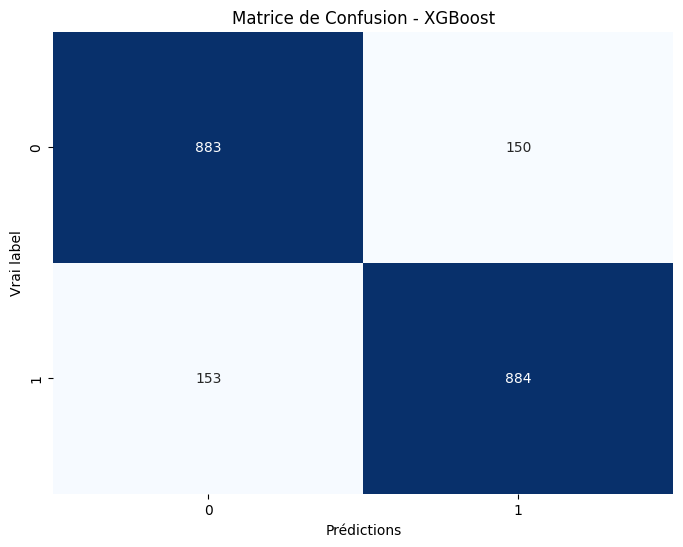

In [94]:
# Affichage de la matrice de confusion
cm_xg = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xg, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion - XGBoost')
plt.xlabel('Prédictions')
plt.ylabel('Vrai label')
plt.show()

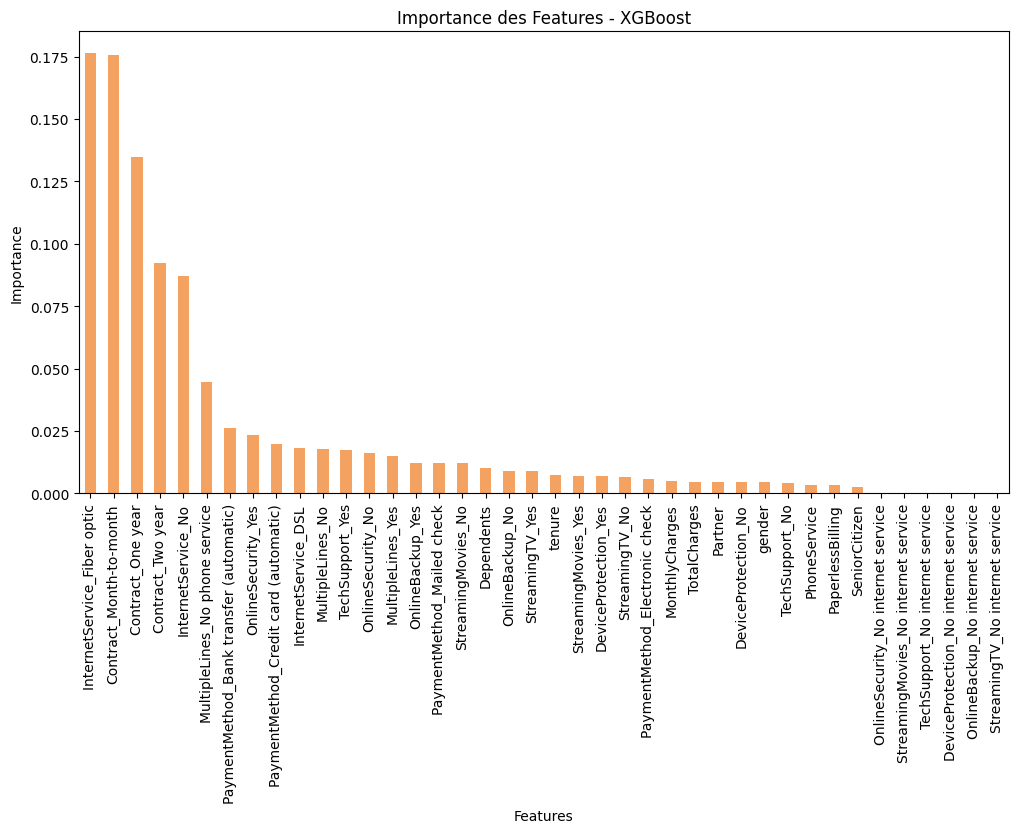

In [118]:
# Extraire l'importance des features
feature_importances_xg = pd.Series(xg_classifier.feature_importances_, index=X_train.columns)

# Trier les features par importance
feature_importances_xg = feature_importances_xg.sort_values(ascending=False)

# Tracer l'importance des features
plt.figure(figsize=(12, 6))
feature_importances_xg.plot(kind='bar', color='#F4A261')
plt.title('Importance des Features - XGBoost')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

🔍 **Résultats :**
</br>

Le modèle **XGBoost** a fourni des résultats très satisfaisants avec une accuracy de **85,36%**, une précision de **85,49%**, un recall de **85,25%**, et un F1-Score de **85,37%**. Ces résultats montrent que le modèle est performant et bien équilibré, avec une légère amélioration par rapport au modèle **Random Forest** sur certaines métriques.

L'importance des features obtenue à partir du modèle **XGBoost** montre que les variables les plus déterminantes pour la prédiction du churn sont **l'InternetService_Fiber optic**, le **Contract_Month-to-month**, **Contract_Two year**. Ces trois variables se démarquent en ayant un impact significatif sur les décisions du modèle. D'autres variables importantes incluent des aspects comme la méthode de paiement et l'ancienneté (tenure), qui influencent également la décision de churn.

📊 En résumé, **XGBoost** offre un modèle robuste qui non seulement obtient des performances solides mais permet également une interprétation fine des facteurs déterminants du churn. Ce modèle s'avère particulièrement utile pour les entreprises qui cherchent à identifier et agir sur les variables influençant le départ des clients.</font>

## LightGBM

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

Dans cette section, j'ai utilisé le modèle **LightGBM** (Light Gradient Boosting Machine) pour la prédiction du churn. **LightGBM** est particulièrement adapté pour des tâches de classification sur des jeux de données volumineux et complexes, grâce à son efficacité en termes de temps d'entraînement et d'utilisation de la mémoire. Basé sur l'approche du **boosting**, il construit des **arbres de décision** de manière séquentielle en corrigeant progressivement les erreurs des arbres précédents. Cela permet de modéliser des interactions complexes entre les variables tout en conservant de bonnes performances de généralisation.</font>

In [97]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

# Initialiser le modèle LightGBM
lgbm_classifier = lgb.LGBMClassifier(random_state=0)

# Entraîner le modèle
lgbm_classifier.fit(X_train, y_train.values.ravel())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4137, number of negative: 4141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499758 -> initscore=-0.000966
[LightGBM] [Info] Start training from score -0.000966


LGBMClassifier(random_state=0)

In [98]:
# Prédire les résultats sur l'ensemble de test
y_pred_lgbm = lgbm_classifier.predict(X_test)

# Calculer la matrice de confusion
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Calculer les métriques
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)

# Afficher les résultats
print(f'LightGBM Accuracy: {accuracy_lgbm:.4f}')
print(f'LightGBM Precision: {precision_lgbm:.4f}')
print(f'LightGBM Recall: {recall_lgbm:.4f}')
print(f'LightGBM F1 Score: {f1_lgbm:.4f}')

LightGBM Accuracy: 0.8609
LightGBM Precision: 0.8604
LightGBM Recall: 0.8621
LightGBM F1 Score: 0.8613


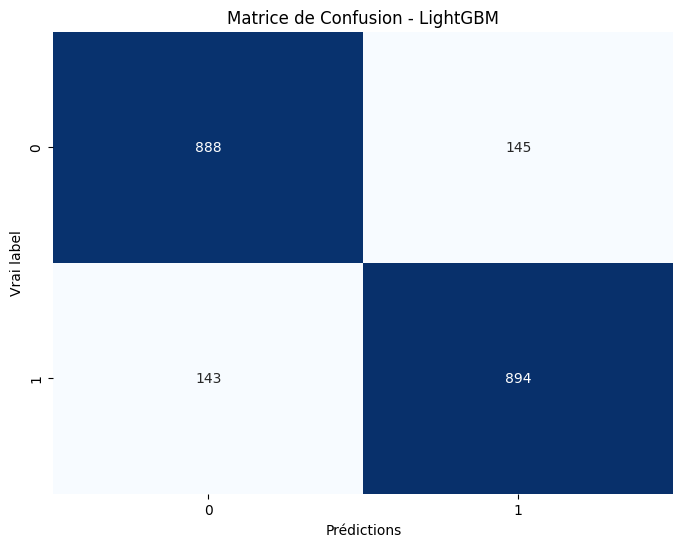

In [100]:
# Calcul de la matrice de confusion
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion - LightGBM')
plt.xlabel('Prédictions')
plt.ylabel('Vrai label')
plt.show()

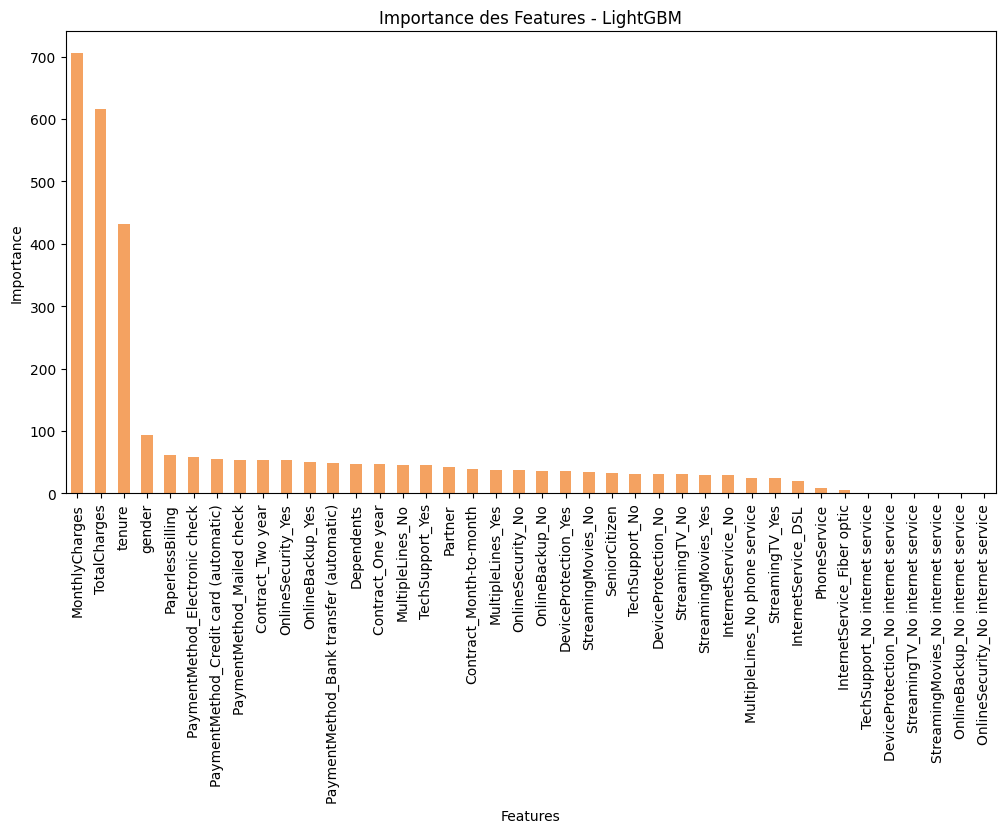

In [119]:
# Extraire l'importance des features
feature_importances_lgbm = pd.Series(lgbm_classifier.feature_importances_, index=X_train.columns)

# Trier les features par importance
feature_importances_lgbm = feature_importances_lgbm.sort_values(ascending=False)

# Tracer l'importance des features
plt.figure(figsize=(12, 6))
feature_importances_lgbm.plot(kind='bar', color='#F4A261')
plt.title('Importance des Features - LightGBM')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

<font size="3" style="font-family:'Open Sans'; line-height:1.5">

🔍 **Résultats :**
</br>

Le modèle **LightGBM** a fourni des résultats très solides avec une accuracy de **86,09%**, une précision de **86,04%**, un recall de **86,21%**, et un F1-Score de **86,13%**. Ces résultats sont parmi les **meilleurs obtenus**, avec un excellent équilibre entre l'accuracy et le recall. Le modèle est capable de bien détecter les churners tout en minimisant les erreurs de prédiction.

L'importance des features, comme le montre le graphique, révèle que les variables les plus influentes sont les frais mensuels ****(MonthlyCharges)****, le montant total facturé (**TotalCharges**), et l'ancienneté (**tenure**). Ces trois variables dominent, tandis que d'autres variables telles que la méthode de paiement et la facturation sans papier (**PaperlessBilling**) jouent également un rôle clé dans la prédiction du churn.

📊 En résumé, **LightGBM** est un modèle performant et efficace qui combine rapidité d'exécution et bonne capacité de généralisation. Il est capable de capturer les interactions complexes entre les variables tout en fournissant une prédiction fiable et précise du churn.</font>

# Conclusion

<font size="3" style="font-family:'Open Sans'; line-height:1.7">

📊 **Les facteurs déterminants du churn :**

L’analyse des **features les plus importantes** à travers les différents modèles a permis de dégager plusieurs facteurs clés influençant la résiliation des abonnements :

- 💸 **Frais mensuels élevés (MonthlyCharges)** : Les clients avec des frais mensuels plus élevés sont plus susceptibles de résilier leur abonnement, probablement en raison d'une insatisfaction par rapport au rapport qualité/prix.  
- 📈 **Montant total facturé (TotalCharges)** : Le montant total accumulé par le client, souvent lié à la durée de l'abonnement, est également un facteur significatif.  
- ⏳ **Ancienneté (tenure)** : Les clients avec une faible ancienneté ont tendance à churner plus souvent, ce qui suggère que les premières interactions avec l'entreprise jouent un rôle crucial.  
- 📅 **Type de contrat (Contract)** : Les clients ayant un contrat mensuel (Month-to-month) sont beaucoup plus susceptibles de churner par rapport à ceux ayant des contrats à plus long terme (Two year).  
- 🛡️ **Services souscrits** : Des variables telles que l'InternetService_Fiber optic, l'absence de services comme la sécurité en ligne (OnlineSecurity) ou le support technique (TechSupport) contribuent également à la décision de résiliation.  

📈 **Exploitation de ces résultats pour prédire le churn :**

Grâce à ces insights, les entreprises de télécommunications peuvent cibler leurs efforts de rétention de manière plus efficace. Par exemple :

- Les clients avec des **frais mensuels élevés** pourraient bénéficier d'offres de réduction ou d'un ajustement personnalisé de leur forfait.  
- Pour les clients avec des **contrats mensuels**, des incitations à signer des contrats à plus long terme pourraient réduire le taux de churn.  
- Les clients ayant une **faible ancienneté** devraient être particulièrement suivis avec des offres promotionnelles et des services personnalisés dès leurs premiers mois.  

🚀 **Optimisation et perspectives :**

Bien que le modèle **LightGBM** ait donné les meilleurs résultats, il est possible **d'optimiser davantage ses performances** en ajustant les **hyperparamètres**. Cela permettrait probablement d'obtenir des résultats encore meilleurs, mais cette étape n'a pas été entreprise dans le cadre de cette analyse. L'objectif ici était de se concentrer sur des modèles facilement interprétables et d'explorer les facteurs influençant le churn sans sur-complexifier l'analyse.

🎯 **Conclusion :**

En conclusion, l’analyse a permis d’identifier les principaux facteurs influençant le churn dans les télécommunications et de développer un modèle prédictif efficace à l’aide de **LightGBM**. Grâce à ces résultats, les entreprises peuvent non seulement anticiper le départ de leurs clients, mais aussi agir en amont en améliorant la satisfaction et en proposant des offres adaptées. Ces efforts stratégiques peuvent avoir un impact significatif sur la rétention des clients à long terme.

</font>